# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [1]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.7999948  2.80444191 2.13556659 2.39801556 2.61586212 2.19415711
 2.4588455  2.98747047 2.35974666 2.7870778 ]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

def uniform_dis(bottom, ceiling, count): 
    my_uniform = uniform.rvs(size= count)
    randoms= bottom + (ceiling-bottom)*my_uniform
    return randoms

param1= uniform_dis(10,15,100)
param2= uniform_dis(10,60,1000)



<AxesSubplot:ylabel='Count'>

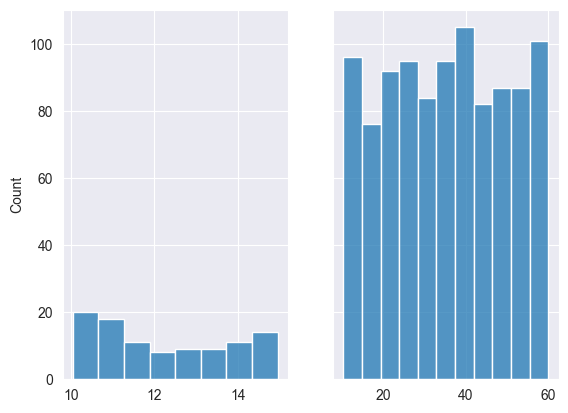

In [36]:
fig, ax = plt.subplots(1, 2,  sharey=True)
sns.histplot(x=param1, ax= ax[0])
sns.histplot(x=param2, ax= ax[1])

How are the two distributions different?

In [ ]:
# The sample size of plot 1 is much less than that of plot 2 and therefore the count of each value within the 
# designated range is less in plot 1 than in plot 2. The ranges of both plots differ. However, the distribution of
# plot 1 is much more uniform than that of plot 2.

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

<AxesSubplot:ylabel='Count'>

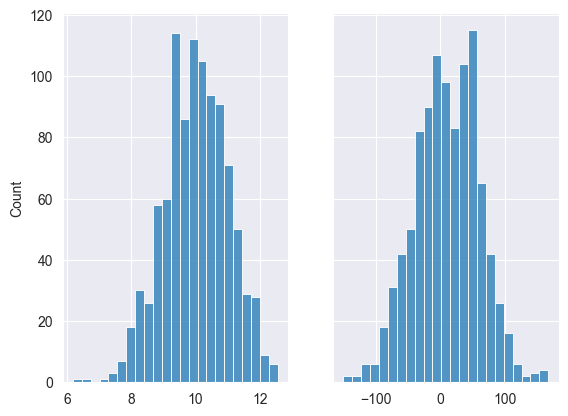

In [39]:
from scipy.stats import norm
def normal_dis(mean, scale, size): 
    my_normal = norm (mean, scale)
    randoms= my_normal.rvs(size= size)
    return randoms 

dis1= normal_dis(10, 1, 1000)
dis2= normal_dis(10, 50, 1000)
fig, ax = plt.subplots(1, 2,  sharey=True)
sns.histplot(x=dis1, ax= ax[0])
sns.histplot(x=dis2, ax= ax[1])

How are the two distributions different?

In [ ]:
# Dis1 has a much smaller range (~6-12) of possible outcomes compared to that of dis2 ~(-100-100). 
# This is caused by the large standard devation of dis2 (50) compared to that of dis1 (1). However
# the shape of both distributions is relatively normal, with that of dis1 being more normal than that of dis2. 

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

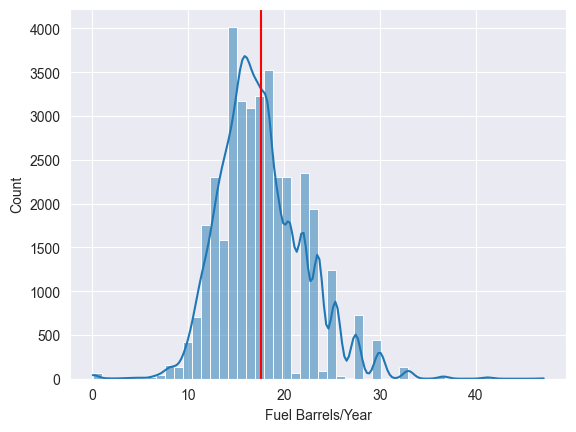

In [137]:
import pandas as pd
vehicles= pd.read_csv('vehicles.csv')

vehicles['Fuel Barrels/Year']

sns.histplot(x=vehicles['Fuel Barrels/Year'], bins=50, kde= True)
plt.axvline(x = vehicles['Fuel Barrels/Year'].mean(), color="red")

2. CO2 Emission Grams/Mile 

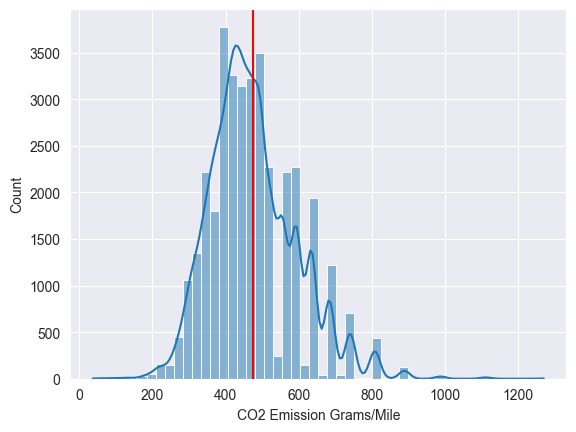

In [134]:
sns.histplot(x=vehicles['CO2 Emission Grams/Mile'], bins= 50, kde= True)
plt.axvline(x = vehicles['CO2 Emission Grams/Mile'].mean(), color="red")

3. Combined MPG

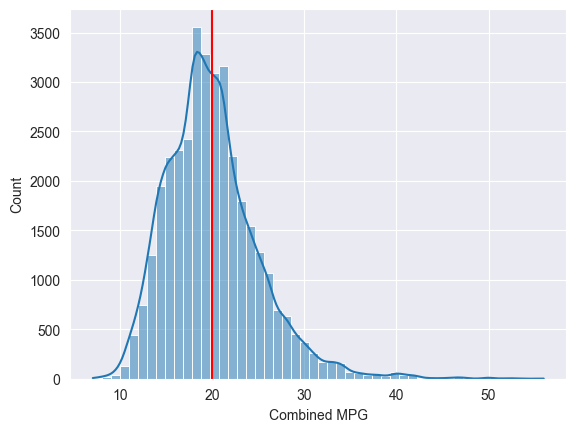

In [133]:
sns.histplot(x=vehicles['Combined MPG'], bins= 50, kde= True)
plt.axvline(x = vehicles['Combined MPG'].mean(), color="red")

In [142]:
vehicles['Combined MPG'].describe()

count    35952.000000
mean        19.929322
std          5.112409
min          7.000000
25%         16.000000
50%         19.000000
75%         23.000000
max         56.000000
Name: Combined MPG, dtype: float64

Which one(s) of the variables are nearly normally distributed? How do you know?

In [ ]:
# Combined MPG is the MOST normally distributed looking at the histogram because its mean is closest to 
# the highest peak of the bell cuve and highest kde.


## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 10 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [114]:
import numpy as np 
def exp_dist(size): 
    randoms= np.random.exponential(scale= 10, size= size)
    return randoms

dist1= exp_dist(size= 10) 
dist2= exp_dist(size= 100) 


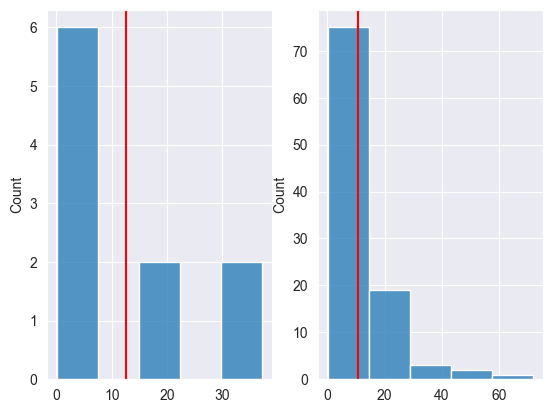

In [115]:

fig, ax = plt.subplots(1, 2)
sns.histplot(x=dist1, bins= 5, ax= ax[0])
ax[0].axvline(x = dist1.mean(), color="red")

sns.histplot(x=dist2, bins= 5, ax= ax[1])
ax[1].axvline(x = dist2.mean(), color="red")

How are the two distributions different?

In [88]:
# Dist2 has a bigger size than dist1 so the counts of each possible outcome are higher, giving a more refined 
# understanding of the distribution than that of dist1. Dist2's histogram shows the exponential distribution much 
# more accurately that that of dist1's because of the difference in the size. 

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [118]:

# Hint: This is same as saying P(x<15)

from scipy.stats import expon
my_e = expon(scale=10)

# Prob: 
my_e.cdf(15)


0.7768698398515702

What is the probability that the customer will spend more than 15 minutes

In [120]:
# Prob: 
(1- my_e.cdf(15))

0.2231301601484298